In [1]:
#Imports
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from scipy.ndimage.measurements import label

[[255 255 255 ...  75  75  71]
 [255 255 255 ...  78  78  77]
 [255 255 255 ...  78  78  77]
 ...
 [255 255 255 ...  93  91  84]
 [255 255 255 ...  93  98  96]
 [255 255 255 ...  89  89  93]]


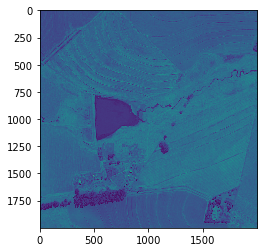

In [2]:
img = cv2.imread('../Data/geoimage1.tif')
data = img[:, :, 0]
data = data[3000:5000, 0:2000]
print(data)
plt.imshow(data)

In [3]:
size = 4
variance_cuttoff = 0.4
height = int(len(data) / size) - 1
width = int(len(data[1]) / size) - 1

result = np.zeros((height, width))

for j in range(height):
    for i in range(width):
        y = j * size
        x = i * size
        if (np.var(data[y:y+size, x:x+size].flatten()) < (variance_cuttoff * size)):
            result[j, i] = 1

In [4]:
n_thresh = 1000

labeled_array, num_features = label(result)
binc = np.bincount(labeled_array.ravel())
noise_idx = np.where(binc <= n_thresh)
shp = result.shape
mask = np.in1d(labeled_array, noise_idx).reshape(shp)
result[mask] = 0

result = np.logical_not(result).astype(int)

labeled_array, num_features = label(result)
binc = np.bincount(labeled_array.ravel())
noise_idx = np.where(binc <= n_thresh)
shp = result.shape
mask = np.in1d(labeled_array, noise_idx).reshape(shp)
result[mask] = 0

result = np.logical_not(result).astype(int)

In [5]:
blur=((3,3),1)
erode_=(5,5)
dilate_=(8, 8)
result = np.float32(result)
result = cv2.dilate(cv2.erode(cv2.GaussianBlur(result, blur[0], blur[1]), np.ones(erode_)), np.ones(dilate_))
result = np.int8(result)

In [6]:
edgeResult = np.zeros((height, width))

for j in range(height - 1):
    for i in range(width - 1):
        if (result[j, i] != result[j, i + 1] 
        or result[j, i] != result[j, i - 1] 
        or result[j, i] != result[j + 1, i]
        or result[j, i] != result[j - 1, i]):
            edgeResult[j, i] = 1
        else:
            edgeResult[j, i] = 0

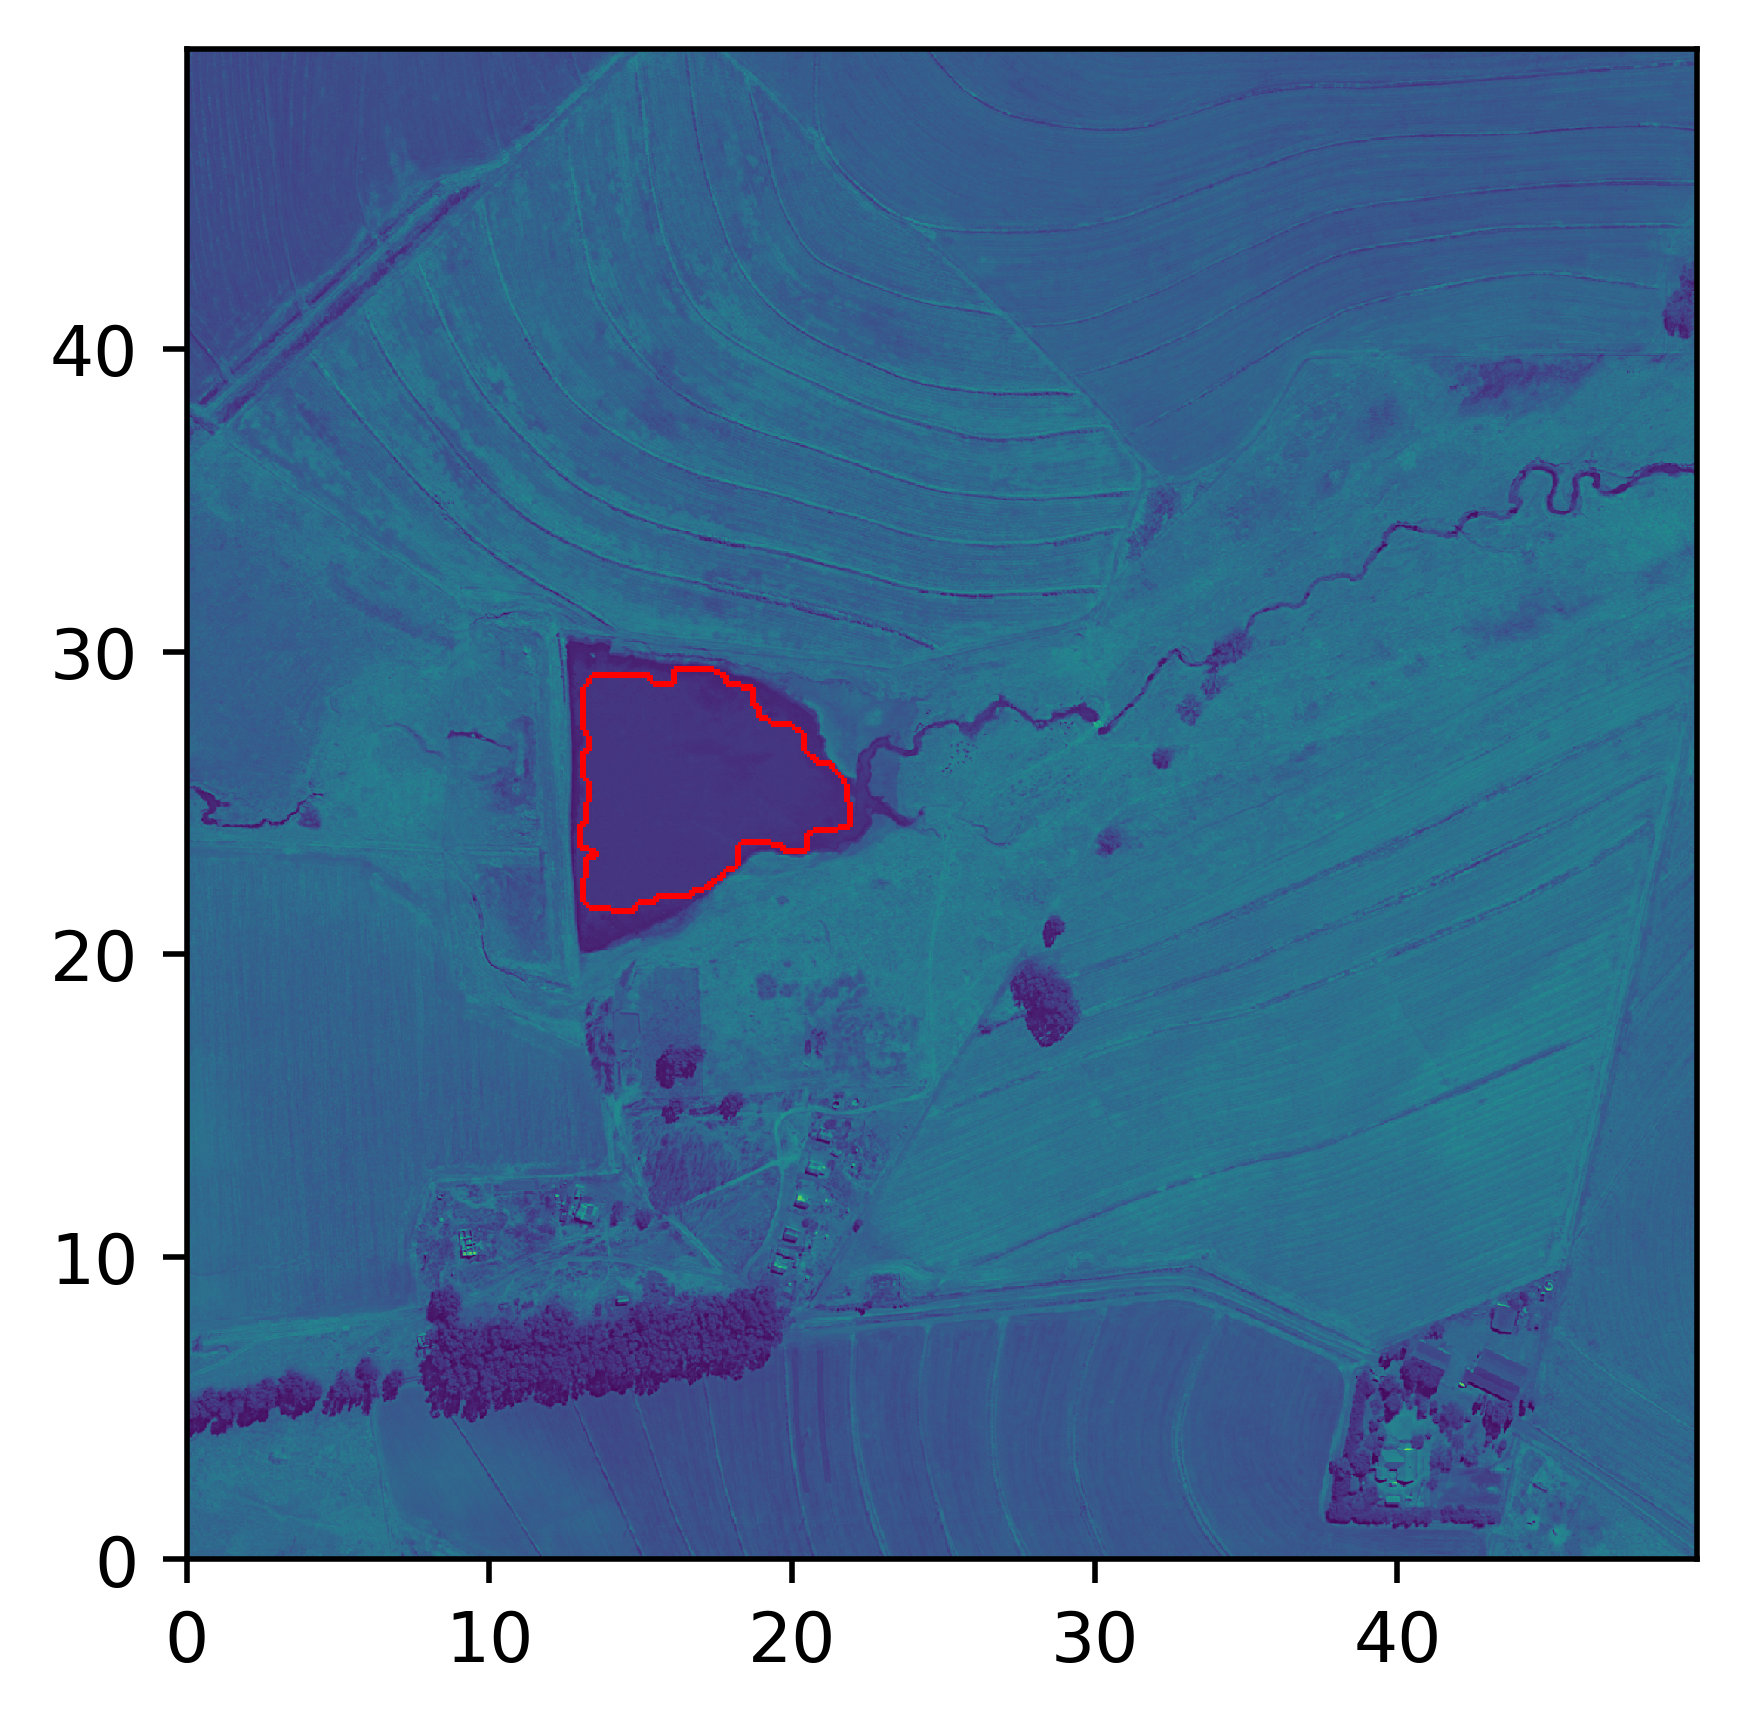

In [7]:
cmap = colors.ListedColormap(['none', 'red'])
bounds = [0,1,2]
norm = colors.BoundaryNorm(bounds, cmap.N)

dx, dy = 0.1, 0.1
x = np.arange(0, 50.0, dx)
y = np.arange(0, 50.0, dy)

extent = np.min(x), np.max(x), np.min(y), np.max(y)
plt.figure(dpi=(500))
im1 = plt.imshow(data, extent=extent)
im2 = plt.imshow(edgeResult, cmap=cmap, norm=norm, extent=extent)
